# DATA_SCI 422 and EARTH 353 | Exercise 2

## Sensing and Mapping the subsurface

### Yangdongling Liu

In this exercise you will unravel the subsurface structure of the Earth from measurements made at its surface. However, the techniques can also be applied to mapping subsurfaces of z-stacks in microscopy, unblurring an image, separating overlapping sources, and any other inverse problems where the data function is written as a Fredholm Integral of the First Kind.

Specifically in this exercise you will apply four different methods of regularization to solving one and the same inverse problem, again an example from seismology. The first of the four methods (“damping”, “penalizing the norm of the model vector”, “Tikhonov regularization”) has been covered in class, the other three will follow shortly. Each of these methods is appropriate, and can play an important role in one or more particular class(es) of under- or mixed-determined inverse problems. For the example we use in this exercise, each of the methods is appropriate and works, though some might provide “better” results than others. 

While P waves are the fastest-propagating type of seismic waves, surface waves are the slowest, as their energy is trapped and channeled near the Earth's surface, where lower pressure and interference slows the waves down. 

A time-series record of a seismic surface wave is like a very-low frequency chirp. The chirpy character is caused by dispersion undergone by the wave as it propagates along the Earth’s surface. In other words, the dominant frequency of the wave’s recording changes with time. As dominant frequency components arrive at different times, so have they experienced different propagation velocities. These velocities are thus functions of the wave's dominant frequency $f$ (or wave period $T = 1/f$) and are called phase velocity $c(T)$. The values of $c(T)$ are determined by how the underlying structure of the Earth varies with depth.

This structure can be represented by a material property, perhaps confusingly called the S velocity $\beta (z)$, which is a function of depth $z $. Correspondingly, small changes in $\beta (z)$ lead to changes in $c(T)$, via a so-called sensitivity kernel $\frac{\partial c}{\partial \beta} (T,z)$. Specifically,

$$\delta c(T) = \int_{0}^{z_max} \frac{\partial c}{\partial \beta} (T,z)  \delta \beta (z) dz$$.


Before further dissecting this integral equation, let's first consider the following system of equations:

$$\begin{pmatrix} 
\mathbf{G} \\
\epsilon \mathbf{R}
\end{pmatrix}
\mathbf{m}
=
\begin{pmatrix} 
\mathbf{d} \\
\mathbf{0}
\end{pmatrix}$$

where $\mathbf{m}$ is the unknown vector of model parameters, $\mathbf{d}$ is the vector of observed data, $\mathbf{G}$ is the matrix that represents the relationship between model parameters and data, $\mathbf{R}$ is a regularization matrix (such as $\mathbf{I}$ in a damped inverse problem), and $\epsilon$ is a weigthing factor for the regularization. 

**Q1**: Use the standard expression for the least squares solution, $\mathbf{m} = (\mathbf{G}^T \mathbf{G})^{-1} \mathbf{G}^T \mathbf{d}$ (for an overdetermined inverse problem $\mathbf{Gm} = \mathbf{d}$) to show that the least-squares solution of a regularized inverse problem (see above) is
$$\mathbf{m} = (\mathbf{G}^T \mathbf{G} + \epsilon^2 \mathbf{R}^T \mathbf{R})^{-1} \mathbf{G}^T \mathbf{d}$$

**A1**: Let
$$\mathbf{G'} = \begin{pmatrix} 
\mathbf{G}\\
\epsilon\mathbf{R}
\end{pmatrix}
,
\mathbf{d'} = \begin{pmatrix} 
\mathbf{d}\\
\mathbf{0}
\end{pmatrix}
$$
Now, 
$$\mathbf{G'}\mathbf{m} = \mathbf{d'}$$
Therefore,
$$\mathbf{m} = (\mathbf{G'}^T \mathbf{G'})^{-1} \mathbf{G'}^T \mathbf{d'}$$
$$\mathbf{m} = (\mathbf{G}^T(\epsilon\mathbf{R})^T \begin{pmatrix}\mathbf{G}\\ \epsilon\mathbf{R} \end{pmatrix})^{-1} (\mathbf{G}^T\mathbf{R}^T) \begin{pmatrix}\mathbf{d}\\ \mathbf{0}\end{pmatrix}$$
$$\mathbf{m} = (\mathbf{G}^T \mathbf{G} + \epsilon^2 \mathbf{R}^T \mathbf{R})^{-1} \mathbf{G}^T \mathbf{d}$$

A surface wave’s phase velocity deviations (from a standard), $\delta c(T)$, can be measured from a seismogram at discrete values of T and represents the data $d_i = \delta c(T_i)$. The unknown model $\delta \beta (z)$ represents the extent to which the Earth's layer properties deviate from the same standard. We choose to parameterize $\delta \beta (z)$ as layer-average values at discrete depths $z_j $, which do not need to be at equal distances form each other. Therefore $m_j = \delta \beta(z_j)$. If the model parameters $\delta \beta(z_j)$ are not known, they can be inferred from the measured data $\delta c(T_i)$ through inversion of the forward problem (given above). In this exercise the data have negligible errors. 
Rewriting the above Fredholm integral equation as a sum over discrete layers for a range of values for T produces the following, familiar system of equations
$$\mathbf{Gm} = \mathbf{d}$$
where $\mathbf{G}$ is constructed fromt he remaining elements of the original integral equation

$$G_{ij} = \frac{\partial c}{\partial \beta} (T_i,z_j) dz_j$$

where $dz_j$ is the thickness of the $j-th$ layer at depth $z_j$.

**Q2**: Verify that you downloaded the following files along with this notebook: 
1. `vs0.txt`  -- the S-velocity of the standard model $\beta (z_j)$
2. `vf.txt`   -- the standard and measured phase velocities, $c(T_i)$ and $c(T_i) + \delta c(T_i)$ 
3. `dcdb.txt` -- the partial derivatives that constitute the elements of matrix $\mathbf{G}$

Then read them into this notebook. You may run the following code to do so.

**A2**:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

earthstructure = open('vs0.txt','r').readlines()
z = np.array([float(s.split()[0]) for s in earthstructure]) 
vs0 = np.array([float(s.split()[1]) for s in earthstructure])

k = len(vs0)
d = zeros(k)
# layer thicknesses: 
d[0] = 0.5*(z[1] - z[0]) 
for i in arange(1,k-1):
    d[i] = 0.5*(z[i+1] - z[i-1])
d[k-1] = 0.5*(z[k-1] - z[k-2])

phasevelocities = open('vf.txt','r').readlines()
T = np.array([float(s.split()[0]) for s in phasevelocities]) 
vf0 = np.array([float(s.split()[1]) for s in phasevelocities]) 
vfm = np.array([float(s.split()[2]) for s in phasevelocities]) 
dvf = vfm - vf0

n = len(vfm)
Gt = zeros([k,n])
dcdb = open('dcdb.txt','r').readlines()
for j in arange(k):
   Gt[j] = array([float(s) for s in dcdb[j].split()])*d[j] 
G = Gt.T

You have now loaded the residual phase velocity data in the array `dvf` (in km/s), the corresponding periods in array `T` (in s), and the matrix $\mathbf{G}$ in 2-dimensional array `G`. The S- and phase velocity of the standard model are stored in `vs0` and `vf0` (in km/s), respectively. The values in `vs0` correspond to the depths in `z`. `G` has `n` rows and `k` columns, does it?

**Q3**: Print n and k: Is the inverse problem $\mathbf{Gm} = \mathbf{d}$
overdetermined, underdetermined, exact-determined, or mixed- determined? Why?

In [13]:
print('k:',k)
print('n:',n)

k: 28
n: 10


**A3**: Because the number of model parameters to be determined k is larger than the number of observed data n, at least part of the problem is underdetermined. But it is unclear whether some parameters might be overdetermined. So it would be more accurate to classify the problem to be mixed-determined.

**Q4**: Plot `vs0(z)` and `vf0(T)` in separate graphs. Also plot the data `vfm(T)`. Compare `vfm` with `vf0`: Do you expect the values of `vs(z) = vs0(z) + dvs(z)`, where `dvs[j]` $= m_j$, to be lower or higher than `vs0(z)`?

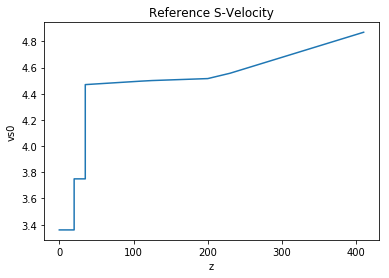

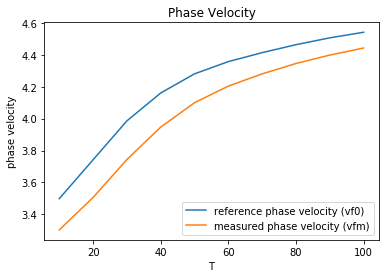

In [103]:
fig, ax = plt.subplots()
plt.title('Reference S-Velocity')
plt.xlabel('z')
plt.ylabel('vs0')
ax.plot(z,vs0)

fig, ax = plt.subplots()
plt.title('Phase Velocity')
plt.xlabel('T')
plt.ylabel('phase velocity')
ax.plot(T,vf0,label='reference phase velocity (vf0)')
ax.plot(T,vfm,label='measured phase velocity (vfm)')
plt.legend()

**A4**: The measured phase velocity vfm is smaller than the reference vf0, which means that the difference dvf is negative. Since $G_{ij}=\frac{\partial c}{\partial \beta}(T_i,z_j)dz_j$ is positive, dvs is negative. In other words, vs(z) is lower than vs0(z).

The matrix `G` contains the partial derivatives of `vf` to `vs`, which tell us how large the effect is of an anomaly in `vs` at depth `j` on `vf` at period `i`. In other words G represents the sensitivity of `dvf(T)` to `dvs(z)`. 

**Q5**: Now visualize the matrix `G`, or its transpose, to show the sensitivity kernels. For example, you could plot $\mathbf{G}^T$ as an image. 

**A5**:

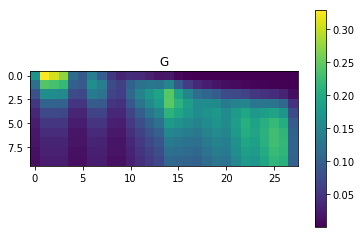

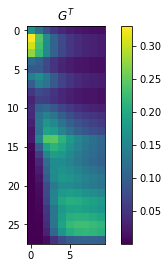

In [19]:
plt.imshow(G)
plt.title('G')
plt.colorbar()
plt.show()

plt.imshow(Gt)
plt.title('$G^T$')
plt.colorbar()
plt.show()

**Q6**: Apply a damped least squares inversion to the given problem. Choose $\epsilon$ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` small. Plot `vs0 + dvs`. Also plot the phase velocity curve predicted by `vs0 + dvs` and compare it with the data.

**A6**:

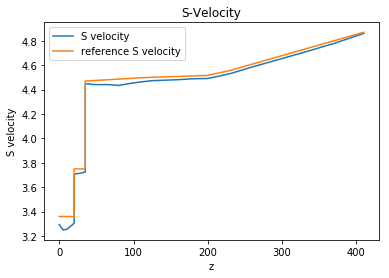

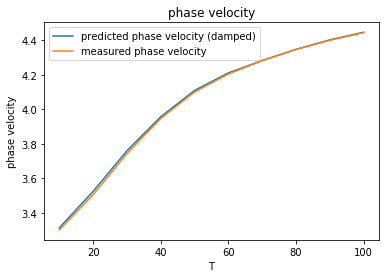

In [133]:
#convert the array of measured phase velocity (dvf) to a vector for the inversion
data = np.zeros((n,1))
for i in range(n):
    data[i] = np.array(dvf[i])
eps = 0.5
R = np.zeros((k,k)) #damping
for i in range(k):
    R[i,i] = 1

m = np.linalg.inv(Gt.dot(G)+eps**2*R.T.dot(R)).dot(Gt).dot(data)
#print(m)

#convert calculated vector m to an array of S velocity (dvs)
dvs_damp = np.zeros(k)
for i in range(k):
    dvs_damp[i] = m[i][0]
vs_damp = dvs_damp + vs0
    
fig, ax = plt.subplots()
plt.title('S-Velocity')
plt.xlabel('z')
plt.ylabel('S velocity')
ax.plot(z,vs_damp,label='S velocity')
ax.plot(z,vs0,label='reference S velocity')
plt.legend()

# fig, ax = plt.subplots()
# plt.title('dvs')
# plt.xlabel('z')
# plt.ylabel('dvs')
# ax.plot(z,dvs)

#predict phase velocity (data_p) from the calculated S velocity 
#and convert it to an array (dvfp)
data_p = G.dot(m)
dvfp_damp = np.zeros(n)
for i in range(n):
    dvfp_damp[i] = data_p[i][0]
vfp_damp = dvfp_damp + vf0
    
fig, ax = plt.subplots()
plt.title('phase velocity')
plt.xlabel('T')
plt.ylabel('phase velocity')
ax.plot(T,vfp_damp,label='predicted phase velocity (damped)')
ax.plot(T,vfm,label='measured phase velocity')
plt.legend()

**Q7**: Apply a flattened least squares inversion to the given problem. Choose $\epsilon$ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` flat (i.e. keeping the first derivative of `dvs(z)` small). Plot `vs = vs0 + dvs`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

**A7**:

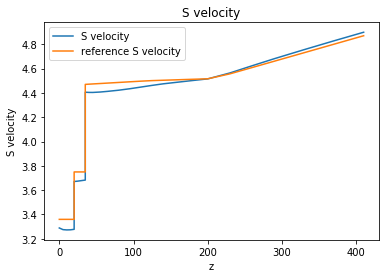

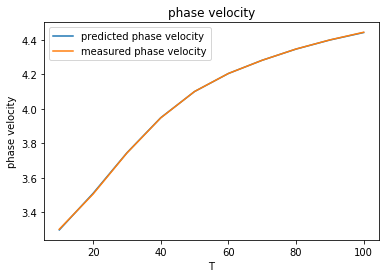

In [134]:
eps = 0.5
R = np.zeros((k-1,k)) #flattening
for i in range(k-1):
    R[i,i] = 1
    R[i,i+1] = -1

m = np.linalg.inv(Gt.dot(G)+eps**2*R.T.dot(R)).dot(Gt).dot(data)
#print(m)

#convert calculated vector m to an array of S velocity (dvs)
dvs_flat = np.zeros(k)
for i in range(k):
    dvs_flat[i] = m[i][0]
vs_flat = dvs_flat + vs0

fig, ax = plt.subplots()
plt.title('S velocity')
plt.xlabel('z')
plt.ylabel('S velocity')
ax.plot(z,vs_flat,label='S velocity')
ax.plot(z,vs0,label='reference S velocity')
plt.legend()

# fig, ax = plt.subplots()
# plt.title('dvs')
# plt.xlabel('z')
# plt.ylabel('dvs')
# ax.plot(z,dvs)

#predict phase velocity (data_p) from the calculated S velocity 
#and convert it to an array (dvfp)
data_p = G.dot(m)
dvfp_flat = np.zeros(n)
for i in range(n):
    dvfp_flat[i] = data_p[i][0]
vfp_flat = dvfp_flat + vf0
    
fig, ax = plt.subplots()
plt.title('phase velocity')
plt.xlabel('T')
plt.ylabel('phase velocity')
ax.plot(T,vfp_flat,label='predicted phase velocity')
ax.plot(T,vfm,label='measured phase velocity')
plt.legend()

**Q8**: Apply a smoothed least squares inversion to the given problem. Choose $\epsilon$ such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` smooth (i.e. keeping the second derivative of `dvs(z)` small). Plot `vs = vs0 + dvs`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

**A8**:

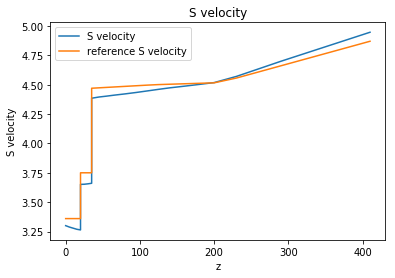

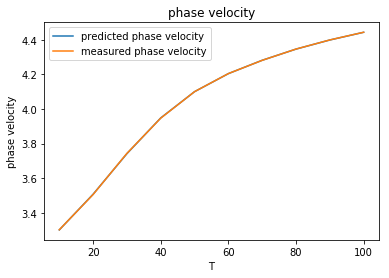

In [135]:
eps = 0.5
R = np.zeros((k-2,k)) #smoothing
for i in range(k-2):
    R[i,i] = 1
    R[i,i+1] = -2
    R[i,i+2] = 1

m = np.linalg.inv(Gt.dot(G)+eps**2*R.T.dot(R)).dot(Gt).dot(data)
#print(m)

#convert calculated vector m to an array of S velocity (dvs)
dvs_smooth = np.zeros(k)
for i in range(k):
    dvs_smooth[i] = m[i][0]
vs_smooth = dvs_smooth + vs0

fig, ax = plt.subplots()
plt.title('S velocity')
plt.xlabel('z')
plt.ylabel('S velocity')
ax.plot(z,vs_smooth,label='S velocity')
ax.plot(z,vs0,label='reference S velocity')
plt.legend()

# fig, ax = plt.subplots()
# plt.title('dvs')
# plt.xlabel('z')
# plt.ylabel('dvs')
# ax.plot(z,dvs)

#predict phase velocity (data_p) from the calculated S velocity 
#and convert it to an array (dvfp)
data_p = G.dot(m)
dvfp_smooth = np.zeros(n)
for i in range(n):
    dvfp_smooth[i] = data_p[i][0]
vfp_smooth = dvfp_smooth + vf0
    
fig, ax = plt.subplots()
plt.title('phase velocity')
plt.xlabel('T')
plt.ylabel('phase velocity')
ax.plot(T,vfp_smooth,label='predicted phase velocity')
ax.plot(T,vfm,label='measured phase velocity')
plt.legend()

**Q9**: Solve the given problem through singular value decomposition of $\mathbf{G}$.
Matrices $\mathbf{U}$, $\mathbf{S}$, and $\mathbf{V}$ can be obtained from the `numpy.linalg.svd` function. Form $\mathbf{S}^{-1}$ by inverting the diagonal elements of $\mathbf{S}^T$ that are larger than a cut-off value, while setting the remaining diagonal elements to `0`. Choose the cut-off value such that the predicted phase velocity curve provides an acceptable fit to the data while keeping `dvs(z)` small. Plot `vs = vs0 + dvs`, and call this model `vsw`. Also plot the phase velocity curve predicted by `vs` and compare it with the data.

**A9**:

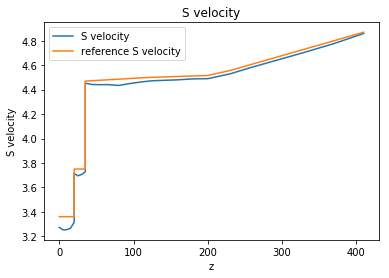

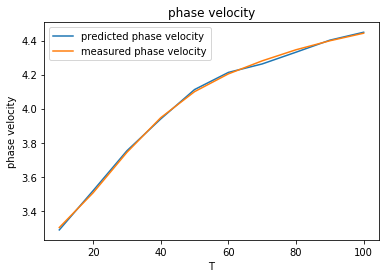

In [136]:
U, s, Vt = np.linalg.svd(G)
#S = np.zeros((n,k))
#S[:n,:n] = np.diag(s)
#Gr = U @ S @ Vt
#print(np.allclose(G,Gr)) True

s_inv = s**(-1)
#print(s)
#print(s_inv)
s_inv_cut = s_inv
cutoff = 1
for i in range(n):
    if s_inv[i] > cutoff:
        s_inv_cut[i] = 0
#print(s_inv_cut)
S_inv = np.zeros((k,n))
S_inv[:n,:n] = np.diag(s_inv_cut)
#print(S_inv)

V = Vt.T
Ut = U.T
m = V @ S_inv @ Ut @ data
#print(m)

#convert calculated vector m to an array of S velocity (dvs)
dvs = np.zeros(k)
for i in range(k):
    dvs[i] = m[i][0]
vsw = vs0 + dvs

fig, ax = plt.subplots()
plt.title('S velocity')
plt.xlabel('z')
plt.ylabel('S velocity')
ax.plot(z,vsw,label='S velocity')
ax.plot(z,vs0,label='reference S velocity')
plt.legend()

# fig, ax = plt.subplots()
# plt.title('dvs')
# plt.xlabel('z')
# plt.ylabel('dvs')
# ax.plot(z,dvs)

#predict phase velocity (data_p) from the calculated S velocity 
#and convert it to an array (dvfp)
data_p = G.dot(m)
dvfp_svd = np.zeros(n)
for i in range(n):
    dvfp_svd[i] = data_p[i][0]
vfp_svd = dvfp_svd + vf0

fig, ax = plt.subplots()
plt.title('phase velocity')
plt.xlabel('T')
plt.ylabel('phase velocity')
ax.plot(T,vfp_svd,label='predicted phase velocity')
ax.plot(T,vfm,label='measured phase velocity')
plt.legend()

**Q10**: Which of the four S-velocity models, `vs`, derived above would you nominate for "best solution"? Why? 

Name your choice for the best model `vsa`, and the second best `vsb`.

**A10**: Mathematically the models all fit the data well. Based on physical meaning, if the reference velocities are thoughtfully determined by an independent source, then it would make sense to minimize the deviation of the derived paramters from the reference. Therefore, damping and SVD are better models. Between these two, SVD is more sophisticated in that it can give the least norm solution compared to the damping regularization.

In [120]:
vsa = vsw
vsb = vs_damp

**Q11**: Choose an element (name it `dvsn`) from the nullspace of $\mathbf{G}$. Plot `vs = vsa + dvsn` and find a way to verify that indeed $\mathbf{G} \cdot \mathbf{dvsn} = \mathbf{0}$.

**A11**:

True


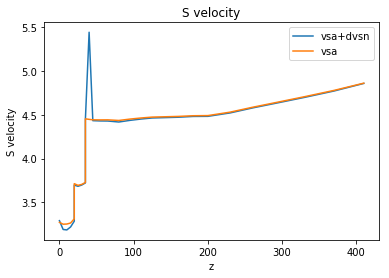

In [137]:
from scipy.linalg import null_space
N = null_space(G)
dvsn = N[:,0]
Z = np.zeros((n,1))
print(np.allclose(G@dvsn,Z)) 
#"True" means that G.dot(dvsn) is close enough to Z (zero vector)

vs = vsa + dvsn
fig, ax = plt.subplots()
plt.title('S velocity')
plt.xlabel('z')
plt.ylabel('S velocity')
ax.plot(z,vs,label='vsa+dvsn')
ax.plot(z,vsa,label='vsa')
plt.legend()

**Q12**: Should `vsa - vsb` be in the null space of $\mathbf{G}$? Is it? Why (not)?

**A12**: It shouldn't, in general. But in special cases, it might be in the null space. It can be determined by evaluating if the dot product of $\mathbf{G}$ and (vsa - vsb) is zero. From the output of the cell below, it is not.

In [138]:
print(np.allclose(G@(vsa-vsb),Z))

False
